## Business Understanding

Healthcare providers face significant challenges in the timely identification and treatment of sepsis. Delays in diagnosis can result in severe complications, extended hospital stays, increased healthcare costs, and a higher risk of mortality. Leveraging machine learning, we aim to create a predictive model to help healthcare professionals identify high-risk patients early, thus improving patient care and reducing costs.

Objectives:
- Early Sepsis Detection: Develop an accurate and reliable machine learning model to predict the onset of sepsis in ICU patients.
- Enhanced Patient Outcomes: Enable timely medical interventions to improve patient survival rates and reduce sepsis-related mortality.
- Cost Reduction: Lower healthcare costs associated with prolonged ICU stays and sepsis treatment by preventing severe cases through early detection.
- Resource Optimization: Optimize the use of medical resources by identifying patients needing urgent attention, thereby increasing the overall efficiency of ICU operations.

## Data Understanding
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### Null Hypothesis
- There is a relationship between a patients body mass index and their blood pressure

#### Alternate Hypothesis
- There is no relationship between a patients body mass index and their blood pressure

Analytical Questions
- Does a patient having an insurance influence their chances of developing a sepsis?
- What age group are more likely to develop Sepsis in ICU?
- Is there a relationship between plasma glucose and body mass index?

In [1]:
## Importing libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
## Loading the dataset

df = pd.read_csv("../data/Paitients_Files_Train.csv")
df.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [3]:
## Checking missing values
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [4]:
##checking for duplicates
df.duplicated().sum()

np.int64(0)

#### Exploratory Data Analysis


In [5]:
##checking info on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
##checking the stats for the various columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


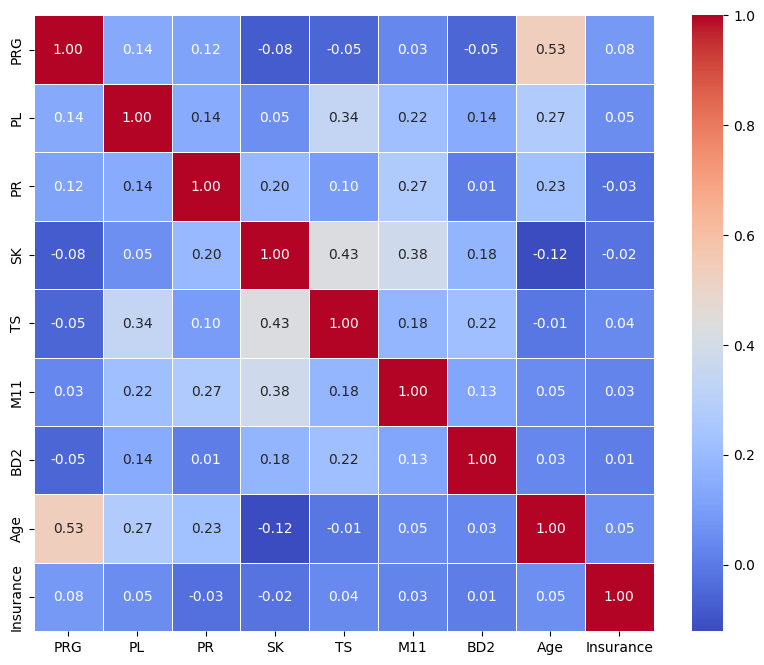

In [7]:
## checking correlation
df_c = df.drop(columns=["ID","Sepssis"])
df_c = df_c.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_c, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()


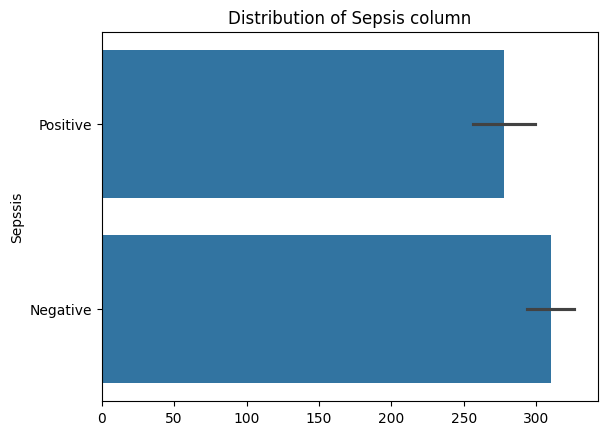

In [8]:
## plotting a bar chart of the sepsis column
sns.barplot(df["Sepssis"])
plt.title("Distribution of Sepsis column")
plt.show()

Observation
- We can see that most of the columns are not normally distributed since the mean and median values are not so close
- Also we need to take note of the imbalanced dataset, that is, Sepssis column has more negatives than positives and this could affect our models prediction is being biased toward one side of the dataset

In [9]:
##dropping the column ID
df = df.drop(columns="ID")

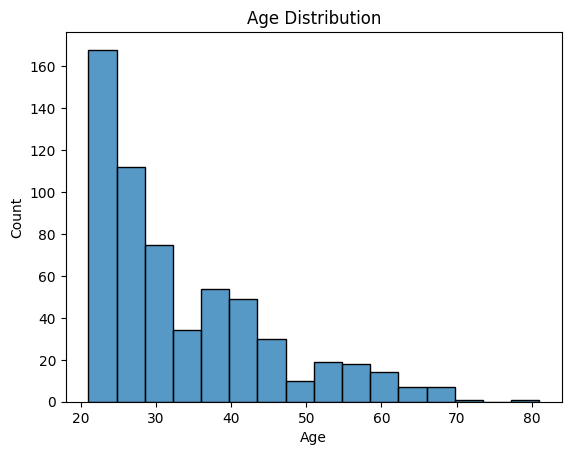

In [10]:
##checking the Age distribution
sns.histplot(df["Age"])
plt.title("Age Distribution")
plt.show()

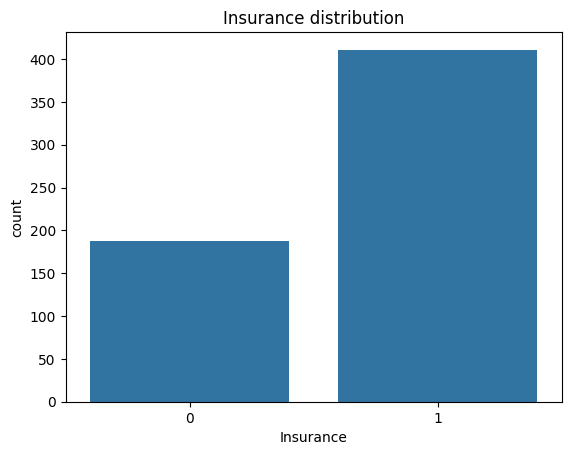

In [11]:
sns.barplot(df["Insurance"].value_counts())
plt.title("Insurance distribution")
plt.show()

In [12]:
df.head(10)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
5,5,116,74,0,0,25.6,0.201,30,1,Negative
6,3,78,50,32,88,31.0,0.248,26,0,Positive
7,10,115,0,0,0,35.3,0.134,29,1,Negative
8,2,197,70,45,543,30.5,0.158,53,1,Positive
9,8,125,96,0,0,0.0,0.232,54,1,Positive


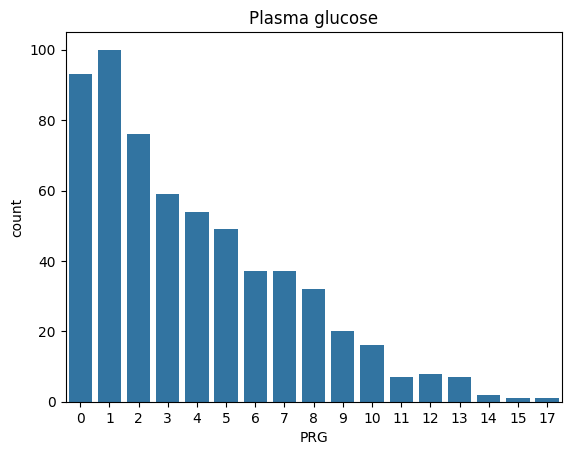

In [13]:
sns.barplot(df["PRG"].value_counts())
plt.title("Plasma glucose")
plt.show()

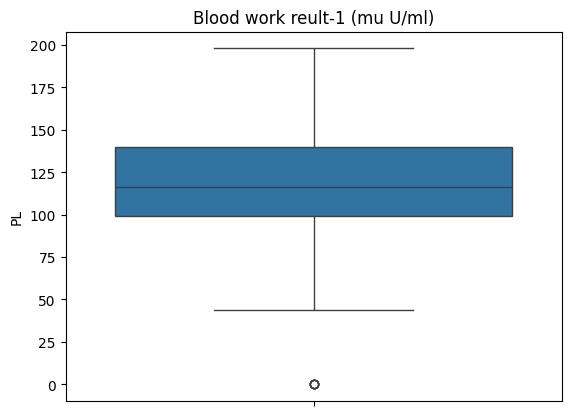

In [14]:
sns.boxplot(df["PL"])
plt.title("Blood work reult-1 (mu U/ml)")
plt.show()

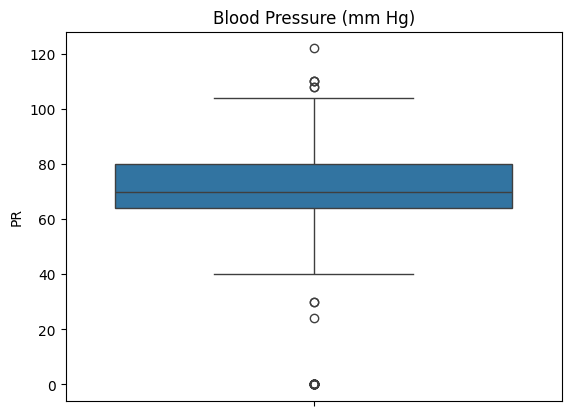

In [15]:
sns.boxplot(df["PR"])
plt.title("Blood Pressure (mm Hg)")
plt.show()

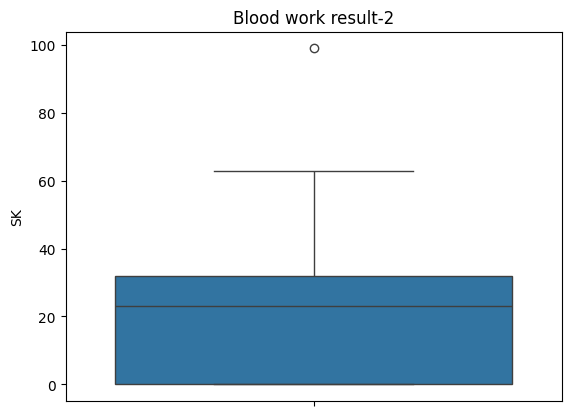

In [16]:
sns.boxplot(df["SK"])
plt.title("Blood work result-2")
plt.show()

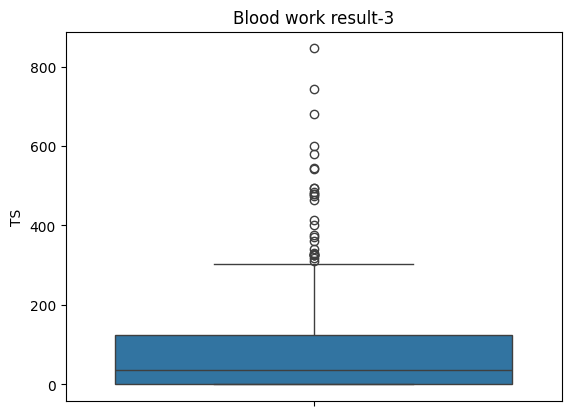

In [17]:
sns.boxplot(df["TS"])
plt.title("Blood work result-3")
plt.show()

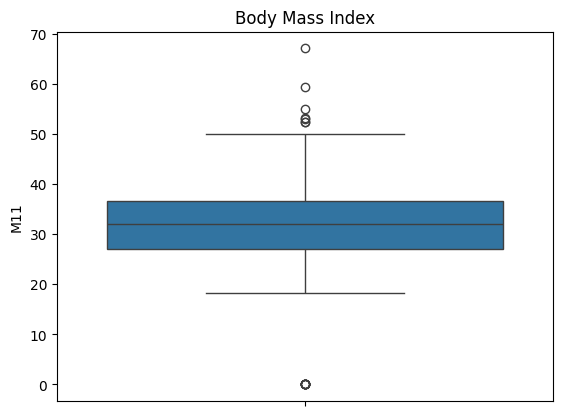

In [18]:
sns.boxplot(df["M11"])
plt.title("Body Mass Index")
plt.show()

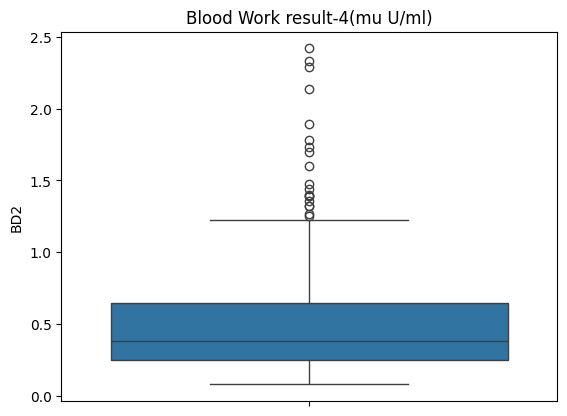

In [19]:
sns.boxplot(df["BD2"])
plt.title("Blood Work result-4(mu U/ml)")
plt.show()

##### Key Observations
- Majority of the patients have insurance
- All the blood work results seem to have outliers (We might have to truncate it or set a lower and upper bound for model efficiency)
- Majority of the patients are in their 20s and the number of patients reduces as age increases

#### Answering analytical questions


1. - Does a patient having an insurance influence their chances of developing a sepsis?

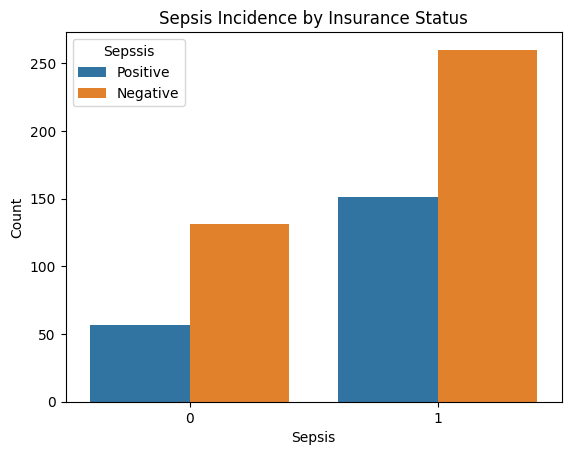

In [20]:
sns.countplot(data=df, x="Insurance", hue="Sepssis")
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.title('Sepsis Incidence by Insurance Status')
plt.show()


- What age group are more likely to develop Sepsis in ICU?

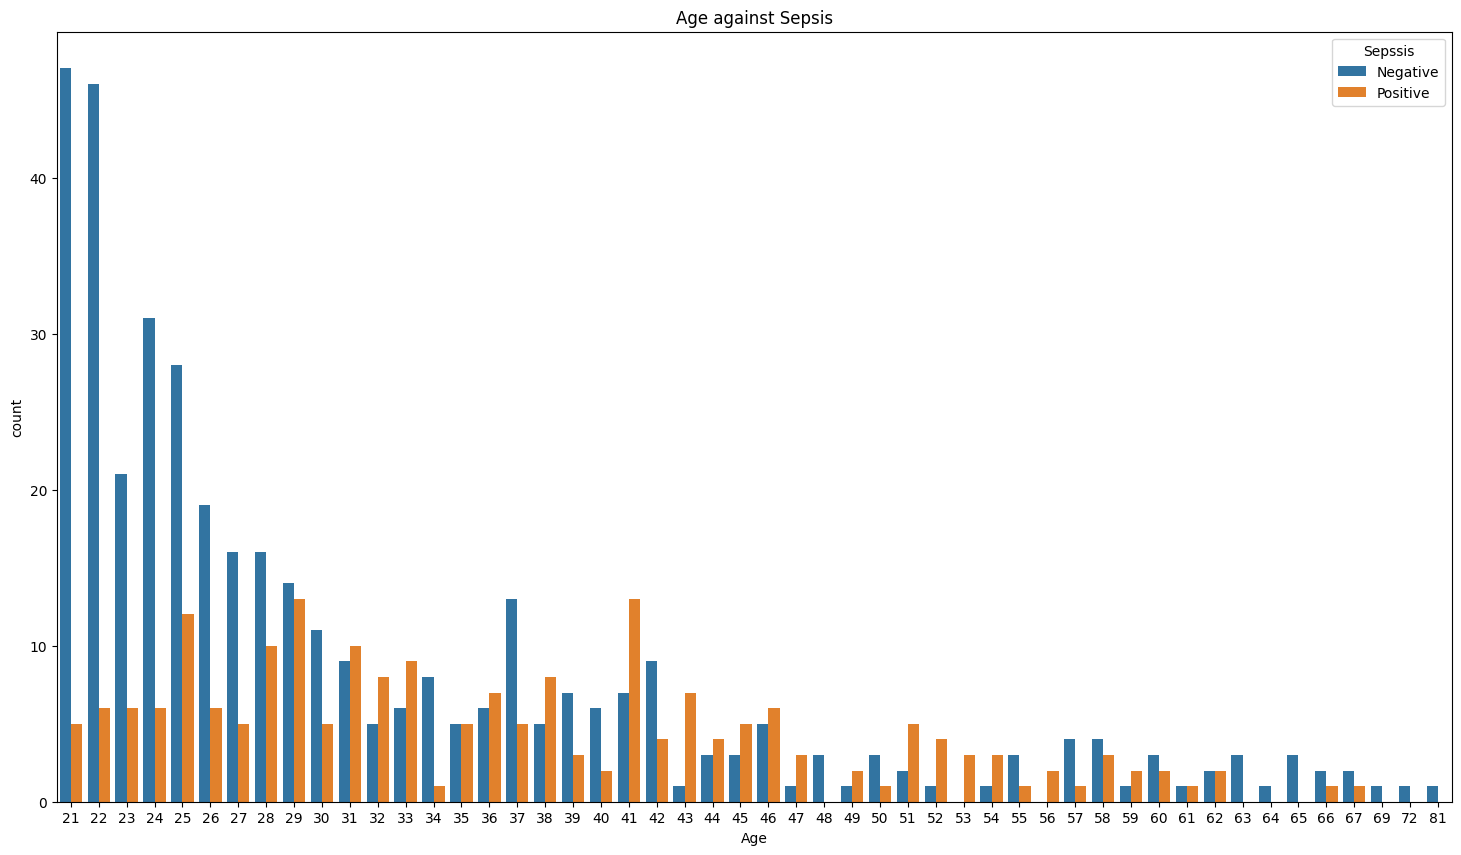

In [21]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="Age", hue="Sepssis")
plt.title("Age against Sepsis")
plt.show()

In [22]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


Hypothesis Testing

In [23]:

# Creating a contigency table
contingency_table = pd.crosstab(df['M11'], df['PR'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# printing results of the p-value
print("P-value:", p)

# printing Results of the t-test
# having alpha to be 0.05(level of significance)
alpha = 0.01
if p < alpha:
    print("Reject the null hypothesis - There is a significant relationship between Patient Body Mass Index terms and Blood Pressure.")
else:
    print("Fail to reject the null hypothesis - There is no significant relationship between Body Mass Index and Blood Pressure.")

P-value: 3.1410804891987544e-09
Reject the null hypothesis - There is a significant relationship between Patient Body Mass Index terms and Blood Pressure.


In [24]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


### Data Preprocessing

In [25]:
label_enc = LabelEncoder()

In [26]:
X = df.drop(columns="Sepssis")
y = df["Sepssis"]

#### Handling Outliers

In [27]:
## Replacing the outliers with the upper and lower bounds 
def replace_outliers(X, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column_name] = df[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

In [28]:
def process_columns(X):
    
    numeric_cols = []
    categorical_cols = []

    for column in X.columns:
        if X[column].dtype != 'object':
            X = replace_outliers(X, column)
            numeric_cols.append(column)
        else:
            categorical_cols.append(column)

    return X, numeric_cols, categorical_cols

In [29]:
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [30]:
X, numeric_cols, categorical_cols = process_columns(X)

In [31]:
## our new features without outliers
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,0,Positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0,Negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1,Positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,1,Negative
4,0.0,137.0,40.0,35.0,168.0,43.1,1.2455,33.0,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6.0,123.0,72.0,45.0,230.0,33.6,0.7330,34.0,0,Negative
595,0.0,188.0,82.0,14.0,185.0,32.0,0.6820,22.0,1,Positive
596,0.0,67.0,76.0,0.0,0.0,45.3,0.1940,46.0,1,Negative
597,1.0,89.0,40.0,19.0,25.0,27.8,0.5590,21.0,0,Negative


In [32]:
numeric_cols

['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

In [33]:
categorical_cols

[]

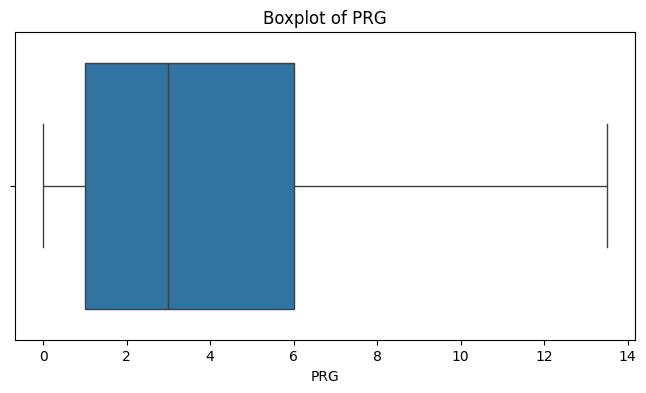

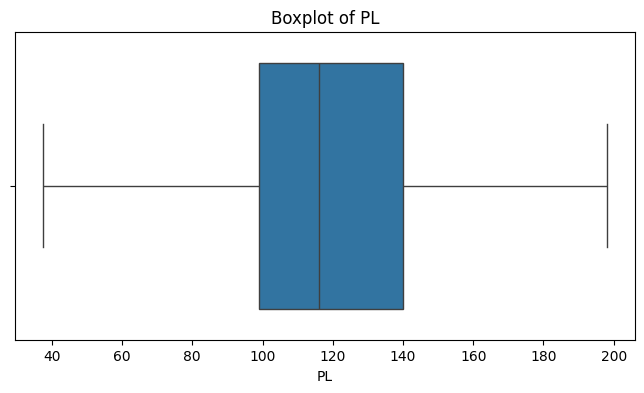

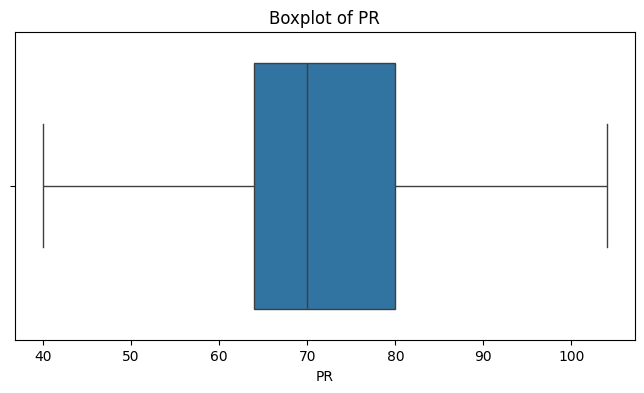

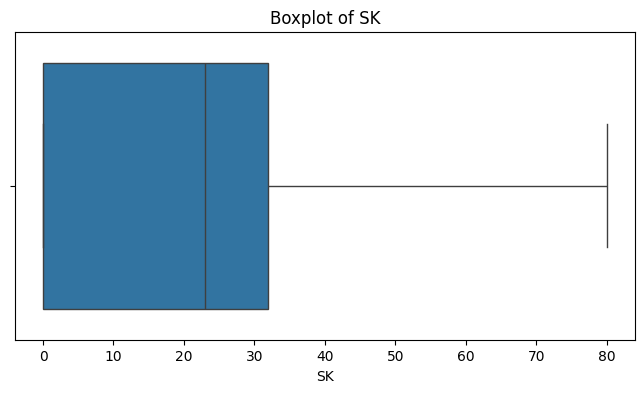

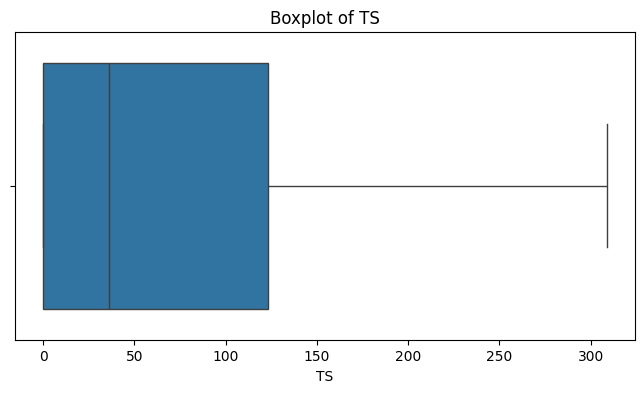

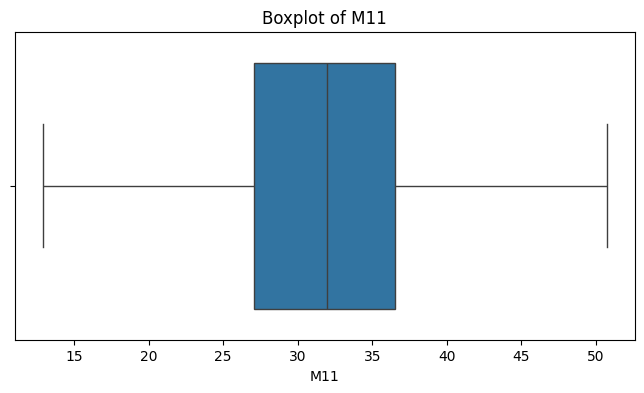

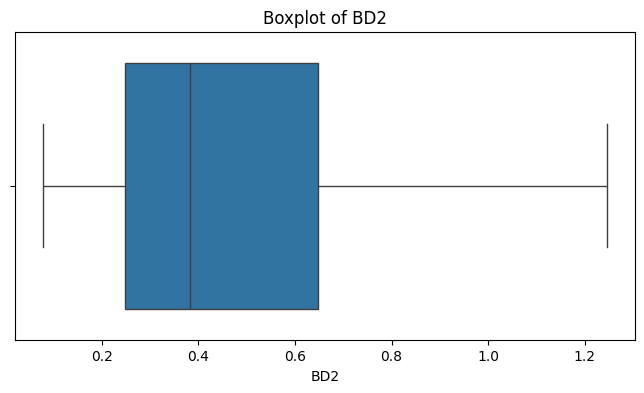

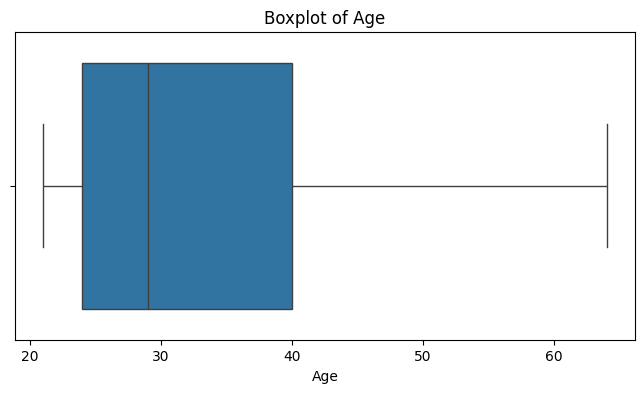

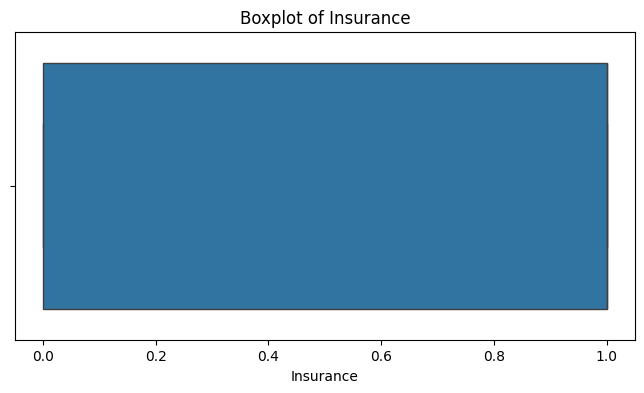

In [34]:
## Checking if all outliers have been handled
for column in X.columns:
    if X[column].dtype != 'object':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=X[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

In [35]:
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,0,Positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0,Negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1,Positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,1,Negative
4,0.0,137.0,40.0,35.0,168.0,43.1,1.2455,33.0,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6.0,123.0,72.0,45.0,230.0,33.6,0.7330,34.0,0,Negative
595,0.0,188.0,82.0,14.0,185.0,32.0,0.6820,22.0,1,Positive
596,0.0,67.0,76.0,0.0,0.0,45.3,0.1940,46.0,1,Negative
597,1.0,89.0,40.0,19.0,25.0,27.8,0.5590,21.0,0,Negative


In [36]:
y

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
594    Negative
595    Positive
596    Negative
597    Negative
598    Positive
Name: Sepssis, Length: 599, dtype: object

In [37]:
# encoding the target y
y_encoded = label_enc.fit_transform(y)

In [38]:
y_encoded[0:5]

array([1, 0, 1, 0, 1])

#### Numerical and Categorical Pipeline 

In [39]:
## creating pipeline for Preprocessing of categorical and numeric columns 
numerical_pipeline = Pipeline(steps=[ 
    ("num_imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", numerical_pipeline, numeric_cols),
    ("cat_pipeline",categorical_pipeline, categorical_cols)
])

In [40]:
best_params_dict = {}
# Create pipelines for each model
pipelines = [
    ("XGBClassifier", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=42))
    ])),
    ("Logistic Regression", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42))
    ])),
    ("Decision Tree", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ]))
]

In [41]:
# Define hyperparameter grids for each model
param_grids = {
    "XGBClassifier": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.3]
    },
    "Logistic Regression": {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10]
    },
    "Decision Tree": {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 20]
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10, 20]
    }
}

# Perform GridSearchCV for each model
for model_name, pipeline in pipelines:
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X, y_encoded)
    best_params_dict[model_name] = grid_search.best_params_
##best params for each model    
best_params_dict


c:\Users\Alphagoal\anaconda3\envs\p5-venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alphagoal\anaconda3\envs\p5-venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alphagoal\anaconda3\envs\p5-venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Alphagoal\anaconda3\envs\p5-venv\Lib\site-packages\

{'XGBClassifier': {'classifier__learning_rate': 0.01,
  'classifier__max_depth': 5,
  'classifier__n_estimators': 200},
 'Logistic Regression': {'classifier__C': 0.1, 'classifier__penalty': 'l2'},
 'Decision Tree': {'classifier__criterion': 'gini',
  'classifier__max_depth': 5},
 'Random Forest': {'classifier__max_depth': 10,
  'classifier__n_estimators': 300}}

In [42]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, C=0.1, penalty='l2')),
    ("Decision Tree", DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)),
    ("Random Forest", RandomForestClassifier(random_state=42, max_depth=10, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, learning_rate=0.01, max_depth=5, n_estimators=200)),
]



In [43]:
all_pipeline={}
all_confusion_matrix={}

##creating dataframe to store all metrics
metric_table = pd.DataFrame(columns=["model", "precision", "recall", "f1-score"])

for model_name, classifier in models:

    final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", classifier)
    ])

    
    # fit data to pipeline
    final_pipeline.fit(X, y_encoded)

    #Add all pipelines into the all_balanced_pipeline dictionary
    all_pipeline[model_name] = final_pipeline
    
    #predicting on evaluation set
    y_pred = final_pipeline.predict(X)

    ##confusion matrix
    conf_matrix = confusion_matrix(y_encoded, y_pred)

    ## Adding all confusion matrix into the all_confusion_matrix dictionary
    all_confusion_matrix[model_name] = conf_matrix

    ##generating classification report for each model or pipeline
    metrics = classification_report(y_encoded, y_pred, output_dict=True)

    ##getting all metrics
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]
    

    print(f"{model_name} model is trained")
   
    ## add key metrics to the metrics table
    metric_table.loc[len(metric_table)] = [model_name, precision, recall, f1_score]
    

metric_table.sort_values(by="f1-score", ascending=False)

Logistic Regression model is trained
Decision Tree model is trained
Random Forest model is trained
XGBoost model is trained


,model,precision,recall,f1-score
2,Random Forest,0.998335,0.998331,0.998330
3,XGBoost,0.890778,0.888147,0.885018
1,Decision Tree,0.838314,0.838063,0.832648
0,Logistic Regression,0.767841,0.772955,0.764269
